In [ ]:
%pip install gensim
%pip install matplotlib

  Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.8 MB/s eta 0:00:004.0 MB/s eta 0:00:01
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from gensim.models import Word2Vec
import gensim.downloader as api
import pprint
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
# TSNE - T distributed stochastic neighbor embedding
def tnse_plot(models, words, seed=23):
  plt.figure(figsize=(15, 8))
  model_ix = 0
  for model in models:
    labels = []
    tokens = []
    
    for word in words:
      tokens.append(model[word])
      labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, max_iter=2500, random_state=seed)
    new_val = tsne_model.fit_transform(np.array(tokens))
    
    x=[]
    y=[]
    for val in new_val:
      x.append(val[0])
      y.append(val[1])
      
    model_ix+=1
    plt.subplot(1, 2, model_ix)
    for i in range(len(x)):
      plt.scatter(x[i], y[i])
      plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom') 

  plt.tight_layout()
  plt.show()

words most similar to 'computer' with word2vec and glove respectively:
[('computers', 0.7979379296302795),
 ('laptop', 0.6640493869781494),
 ('laptop_computer', 0.6548868417739868),
 ('Computer', 0.6473335027694702),
 ('com_puter', 0.6082079410552979)]
[('camera', 0.907833456993103),
 ('cell', 0.891890287399292),
 ('server', 0.874466598033905),
 ('device', 0.8693523406982422),
 ('wifi', 0.8631256818771362)]
words most similar to 'king' with word2vec and glove respectively:
[('kings', 0.7138045430183411),
 ('queen', 0.6510956287384033),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204219460487366),
 ('prince', 0.6159993410110474)]
[('prince', 0.93374103307724),
 ('queen', 0.920242190361023),
 ('aka', 0.9176923036575317),
 ('lady', 0.9163240194320679),
 ('jack', 0.9147355556488037)]
Number of common words: 2563


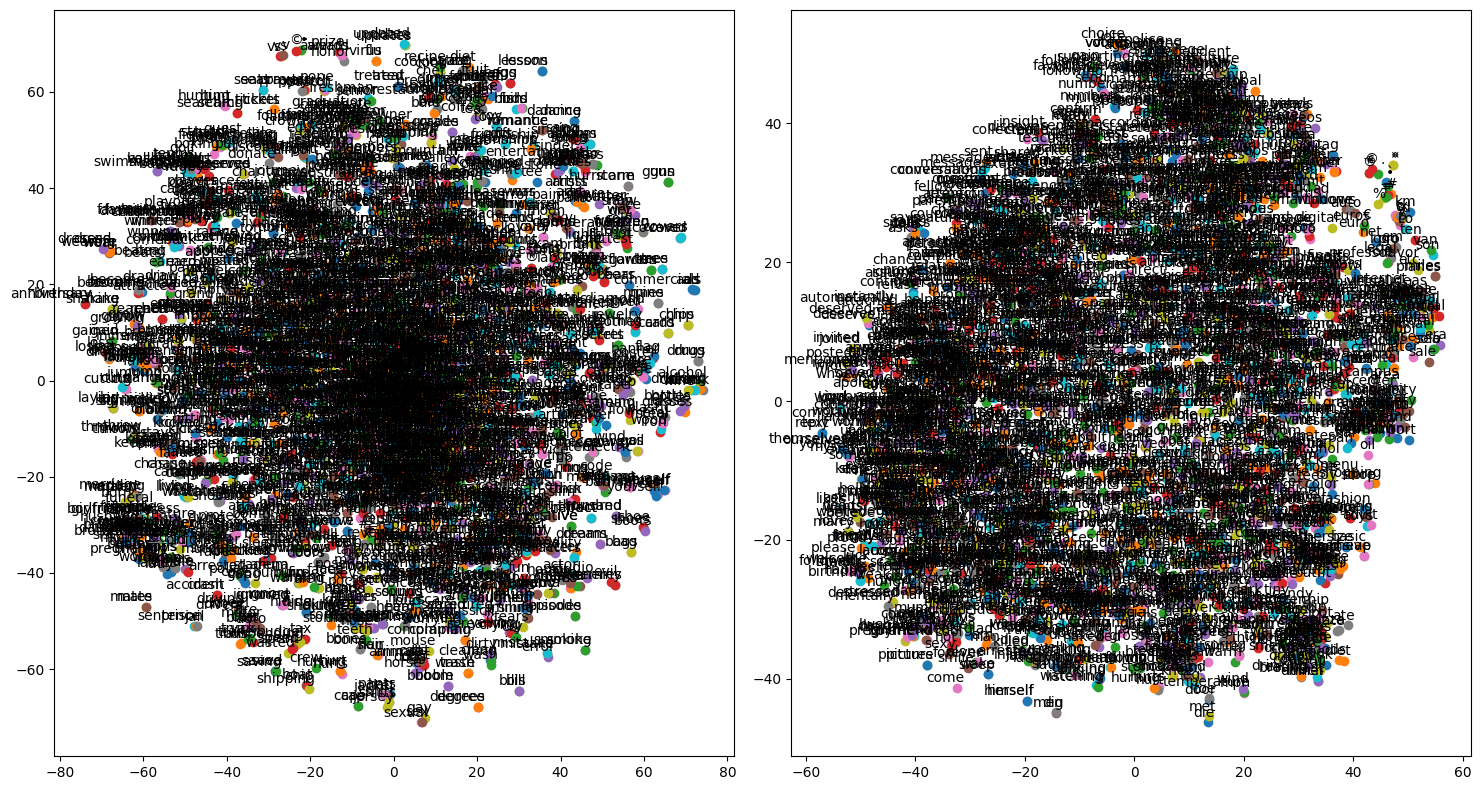

In [ ]:
v2w_model = api.load('word2vec-google-news-300')
v2w_model.name = 'Word2Vec'
glove_model = api.load('glove-twitter-25')
glove_model.name = 'GloVe'

print("words most similar to 'computer' with word2vec and glove respectively:")

pprint.pprint(v2w_model.most_similar('computer', topn=5))
pprint.pprint(glove_model.most_similar('computer', topn=5))

print("words most similar to 'king' with word2vec and glove respectively:")

pprint.pprint(v2w_model.most_similar('king', topn=5))
pprint.pprint(glove_model.most_similar('king', topn=5))

sample_common_words = list(set(v2w_model.index_to_key[100:10000])
                           & set(glove_model.index_to_key[100:10000]))

print(f"Number of common words: {len(sample_common_words)}")

tnse_plot([v2w_model, glove_model], sample_common_words)

